In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

import warnings
warnings.filterwarnings('ignore')

# Collecting the results of the experiments

## Functions

In [2]:
def recursive_results(path,dirlist,str_, res_):
    """ 
    A recursive search for the results - it's like a sniffing dog really.
    """
    if "res_summary.csv" in dirlist:
        res = pd.read_csv(os.path.join(path,"res_summary.csv"))
        return [res], str_
    else:
        r_tmp = res_.copy()
        s_tmp = []
        for d in dirlist:
            path_ = os.path.join(path,d)
            r_, s_ = recursive_results(path_, os.listdir(path_), [str_[0] + "-*-" + d],res_)
            r_tmp = r_tmp + r_
            s_tmp = s_tmp + s_
        return r_tmp, s_tmp
    
def get_time_series(df,signal):
    ts = []
    for stage in ['Low','Mid-low','Mid-high','High']:
        df_ = df[stage].copy()
        ts.append(df_.loc[df_.Signal==signal]["p-value"].item())
    return ts

## Tables

making automatic latex tables. Not pretty but efficient. American style.

In [3]:
ihdp_path = "ihdp_old"

dir_path = os.path.join("results", ihdp_path)
setups = ["samePOihdp_GC","samePOihdp-highhc_GC","samePOihdp-lowhc_GC","diffPOihdp-highdiff_GC","diffPOihdp-lowdiff_GC"]

setups_names_dict = {"samePOihdp_GC": "Same PO, GC",
                     "samePOihdp-highhc_GC": "Same PO, GC, high HC",
                     "samePOihdp-lowhc_GC": "Same PO, GC, low HC",
                     "diffPOihdp-highdiff_GC": "Diff PO, GC, high diff",
                     "diffPOihdp-lowdiff_GC": "Diff PO, GC, low diff"}

### Collecting results and aggregating in a big fat ass DF

In [4]:
M = "3"

In [5]:
df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

In [6]:
print(df.to_latex(escape = False,index = False))

\begin{tabular}{llllrllllrllllrllllrllllr}
\toprule
\multicolumn{5}{r}{Same PO, GC} & \multicolumn{5}{r}{Same PO, GC, high HC} & \multicolumn{5}{r}{Same PO, GC, low HC} & \multicolumn{5}{r}{Diff PO, GC, high diff} & \multicolumn{5}{r}{Diff PO, GC, low diff} \\
Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value \\
\midrule
CDR & 3 & CD-10 & UC-0 & 0.075000 & IPCW & 3 & CD-10 & UC-1 & 0.800000 & DR-Impute & 3 & CD-10 & UC-1 & 0.800000 & IPW-Impute & 3 & CD-10 & UC-0 & 0.025000 & DR-Impute & 3 & CD-10 & UC-0 & 0.175000 \\
DR-Drop & 3 & CD-10 & UC-0 & 0.100000 & DR-Drop & 3 & CD-10 & UC-1 & 1.000000 & CDR & 3 & CD-10 & UC-1 & 0.525000 & IPW-Drop & 3 & CD-10 & UC-0 & 0.000000 & CDR & 3 & CD-10 & UC-0 & 0.100000 \\
DR-Impute & 3 & CD-10 & UC-0 & 0.025000 & DR-Impute & 3 & CD-10 & UC-1 & 1.000000 & IPW-Drop & 3 & CD-10 & UC-1 & 0.050000 & DR-Drop & 3 & CD-10 & UC-0 & 0.950000 & IPW-

In [7]:
df

Same PO, GC                           Same PO, GC, high HC              \
        Signal    M     CD    UC p-value               Signal    M     CD   
3          CDR    3  CD-10  UC-0   0.075                 IPCW    3  CD-10   
1      DR-Drop    3  CD-10  UC-0   0.100              DR-Drop    3  CD-10   
5    DR-Impute    3  CD-10  UC-0   0.025            DR-Impute    3  CD-10   
6         IPCW    3  CD-10  UC-0   0.000                  NaN  NaN    NaN   
8     IPW-Drop    3  CD-10  UC-0   0.000                  NaN  NaN    NaN   
11  IPW-Impute    3  CD-10  UC-0   0.000                  NaN  NaN    NaN   
0          NaN  NaN    NaN   NaN     NaN                  CDR    3  CD-10   
2          NaN  NaN    NaN   NaN     NaN             IPW-Drop    3  CD-10   
4          NaN  NaN    NaN   NaN     NaN           IPW-Impute    3  CD-10   

                  ... Diff PO, GC, high diff                            \
      UC p-value  ...                 Signal    M     CD    UC p-value   
3   UC-1   0.800  ...             IPW-Impute    3  CD-10  UC-0   0.025   
1   UC-1   1.000  ...               IPW-Drop    3  CD-10  UC-0   0.000   
5   UC-1   1.000  ...                DR-Drop    3  CD-10  UC-0   0.950   
6    NaN     NaN  ...                    NaN  NaN    NaN   NaN     NaN   
8    NaN     NaN  ...                    NaN  NaN    NaN   NaN     NaN   
11   NaN     NaN  ...                    NaN  NaN    NaN   NaN     NaN   
0   UC-1   0.725  ...              DR-Impute    3  CD-10  UC-0   0.625   
2   UC-1   1.000  ...                   IPCW    3  CD-10  UC-0   0.800   
4   UC-1   1.000  ...                    CDR    3  CD-10  UC-0   0.825   

   Diff PO, GC, low diff                            
                  Signal    M     CD    UC p-value  
3              DR-Impute    3  CD-10  UC-0   0.175  
1                    CDR    3  CD-10  UC-0   0.100  
5             IPW-Impute    3  CD-10  UC-0   0.000  
6                    NaN  NaN    NaN   NaN     NaN  
8                    NaN  NaN    NaN   NaN     NaN  
11                   NaN  NaN    NaN   NaN     NaN  
0               IPW-Drop    3  CD-10  UC-0   0.000  
2                DR-Drop    3  CD-10  UC-0   0.375  
4                   IPCW    3  CD-10  UC-0   0.000  

[9 rows x 25 columns]

## Figures

In [8]:
ts = {}
ihdp_path = "ihdp_old"

################

ts['diff'] = {}

dir_path = os.path.join("results", ihdp_path)
setups = ["diffPOihdp-lowdiff","diffPOihdp-midlowdiff","diffPOihdp-midhighdiff","diffPOihdp-highdiff"]
#setups = ["diffPOihdp-midlowdiff","diffPOihdp-midhighdiff"]

setups_names_dict = {"diffPOihdp-lowdiff": "Low",
                        "diffPOihdp-midlowdiff": "Mid-low",
                        "diffPOihdp-midhighdiff": "Mid-high",
                        "diffPOihdp-highdiff": "High"}

df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['diff'][signal] = get_time_series(df,signal)
                                         
################
        
ts['conf'] = {}
dir_path = os.path.join("results", ihdp_path)
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])
                                         
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['conf'][signal] = get_time_series(df,signal)
    
################

ts['diffGC'] = {}

dir_path = os.path.join("results", ihdp_path)
setups = ["diffPOihdp-lowdiff_GC","diffPOihdp-midlowdiff_GC","diffPOihdp-midhighdiff_GC","diffPOihdp-highdiff_GC"]
#setups = ["diffPOihdp-midlowdiff","diffPOihdp-midhighdiff"]

setups_names_dict = {"diffPOihdp-lowdiff_GC": "Low",
                        "diffPOihdp-midlowdiff_GC": "Mid-low",
                        "diffPOihdp-midhighdiff_GC": "Mid-high",
                        "diffPOihdp-highdiff_GC": "High"}

df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['diffGC'][signal] = get_time_series(df,signal)
                                         
################
        
ts['confGC'] = {}
dir_path = os.path.join("results", ihdp_path)
setups = ["samePOihdp-lowhc_GC","samePOihdp-midlowhc_GC", "samePOihdp-midhighhc_GC", "samePOihdp-highhc_GC"]

setups_names_dict = {"samePOihdp-lowhc_GC": "Low",
                        "samePOihdp-midlowhc_GC": "Mid-low",
                        "samePOihdp-midhighhc_GC": "Mid-high",
                        "samePOihdp-highhc_GC": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])
                                         
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['confGC'][signal] = get_time_series(df,signal)
                                             


In [13]:
np.linspace(0,1,11).shape

(11,)

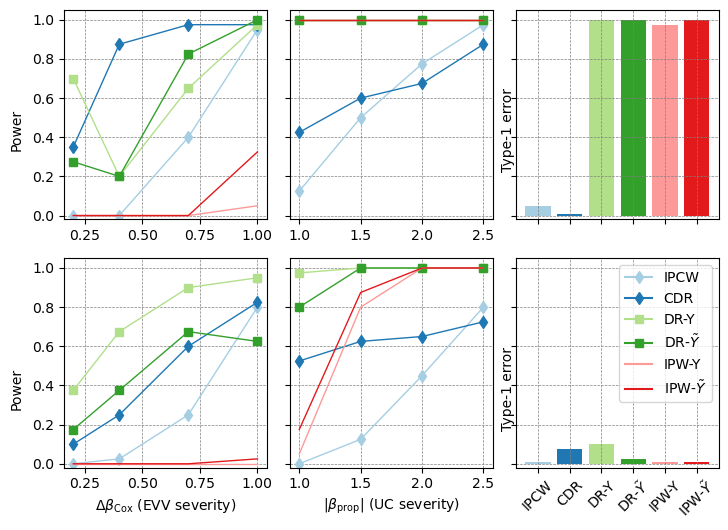

In [67]:
fig, axs = plt.subplots(2, 3, sharey='row', figsize=(7.2, 5.4))
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

signal_names = ["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]
signal_plot_names = {"IPCW": "IPCW",
                     "CDR": "CDR",
                     "DR-Drop": "DR-"+r"$Y$",
                     "DR-Impute": "DR-"+r"$\tilde{Y}$",
                     "IPW-Drop": "IPW-"+r"$Y$",
                     "IPW-Impute": "IPW-"+r"$\tilde{Y}$",}
xs_diff = [0.2,0.4,0.7,1.0]
xs_conf = [1,1.5,2,2.5]

type1_gc = type1_gc = [max(pd.read_csv(f"results/ihdp_old/samePOihdp_GC/['{sig}']/M-[3]/CD-10/UC-0/res_summary.csv").loc[0][1], 0.01) for sig in signal_names] 
type1_cic  = [max(pd.read_csv(f"results/ihdp_old/samePOihdp/['{sig}']/M-[3]/CD-10/UC-0/res_summary.csv").loc[0][1], 0.01) for sig in signal_names] 

axs[0,0].set_yticks([0, 0.2, 0.4, 0.6 ,0.8, 1])
axs[1,0].set_yticks([0, 0.2, 0.4, 0.6 ,0.8, 1])
axs[0,0].set_ylim(-.02, 1.05)
axs[1,0].set_ylim(-.02, 1.05)

axs[0,0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[0,1].grid(color='gray', linestyle='--', linewidth=0.5)
axs[0,2].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1,0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1,1].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1,2].grid(color='gray', linestyle='--', linewidth=0.5)

lines = []

for i,signal in enumerate(signal_names): 
    label_name = signal_plot_names[signal]
    lines.append(mlines.Line2D([], [], color=palette[i], marker=marker[i], linestyle='-', label=label_name))
    axs[0,0].plot(xs_diff, ts['diff'][signal],label = label_name, linewidth = 1, marker=marker[i], color=palette[i])
    axs[0,1].plot(xs_conf, ts['conf'][signal],label = label_name, linewidth = 1, marker=marker[i], color=palette[i])
    axs[1,0].plot(xs_diff, ts['diffGC'][signal],label = label_name, linewidth = 1, marker=marker[i], color=palette[i])
    axs[1,1].plot(xs_conf, ts['confGC'][signal],label = label_name, linewidth = 1, marker=marker[i], color=palette[i])

axs[0,2].bar(signal_plot_names.values(), type1_cic, color=palette)
axs[0,2].set_xticklabels([])
axs[1,2].bar(signal_plot_names.values(), type1_gc, label=signal_names, color=palette)
axs[1,2].tick_params(labelrotation=45)

plt.tight_layout()

axs[1,1].set_xlabel(r"$| \beta_{\mathrm{prop}} |$ (UC severity)", fontsize = 10)
axs[1,0].set_xlabel(r"$\Delta \beta_{\mathrm{Cox}}$ (EVV severity)", fontsize = 10)
fig.text(-0.01, 0.75, 'Power', va='center', rotation='vertical', fontsize = 10)
fig.text(-0.01, 0.27, 'Power', va='center', rotation='vertical', fontsize = 10)
fig.text(.672, 0.75, 'Type-1 error', va='center', rotation='vertical', fontsize = 10)
fig.text(.672, 0.27, 'Type-1 error', va='center', rotation='vertical', fontsize = 10)


plt.legend(handles=lines, bbox_to_anchor=(1, 1))

plt.savefig('./results/figures/CIC-Sweep.pdf', bbox_inches='tight')
plt.savefig('./results/figures/CIC-Sweep.png', bbox_inches='tight')

plt.show()

In [38]:
lines

[[<matplotlib.lines.Line2D at 0x7f7aedb14410>],

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 3))
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

xs_diff = [0.2,0.4,0.7,1.0]
xs_conf = [1,1.5,2,2.5]

for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):    
    ax2.plot(xs_conf, ts['confGC'][signal],label = signal, linewidth = 2, marker=marker[i], color=palette[i])
    ax1.plot(xs_diff, ts['diffGC'][signal],label = signal, linewidth = 2, marker=marker[i], color=palette[i])

ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

ax2.legend()
ax1.set_ylabel("Power", fontsize = 12)

ax2.set_xlabel(r"$| \beta_k |$ (Unmeasured confounding severity)", fontsize = 12)
ax1.set_xlabel(r"$\Delta \beta_k$ (External validation violation severity)", fontsize = 12)
plt.savefig('./results/figures/CIC-Sweep.pdf', bbox_inches='tight')
plt.show()

In [ ]:
xs = [0.2,0.4,0.7,1.0]
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

plt.figure()
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ys = ts['diff'][signal]
    plt.plot(xs, ys,label = signal, linewidth = 2, marker=marker[i], color=palette[i])
#plt.legend(fontsize = 15,loc = "lower right",bbox_to_anchor=(1.45, 0.0))
#plt.legend(fontsize = 10)
plt.ylabel("Power", fontsize = 12)
plt.xlabel(r"$\Delta \beta_k$ (External validation violation severity)", fontsize = 12)
plt.show()

In [ ]:
get_time_series(df,"CDR")

In [ ]:
xs = [1,1.5,2,2.5]
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

plt.figure()
cnt = 1
plt.figure()
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ys = ts['conf'][signal]
    plt.plot(xs, ys,label = signal, linewidth = 2, marker=marker[i], color=palette[i])
#plt.legend(fontsize = 15,loc = "lower right",bbox_to_anchor=(1.45, 0.0))
plt.legend(fontsize = 10)
plt.ylabel("Power", fontsize = 12)
plt.xlabel(r"$| \beta_k |$ (Unmeasured confounding severity)", fontsize = 12)
plt.show()

### Hidden confounders

In [ ]:
dir_path = os.path.join("results", ihdp_path)
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])